In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

          X         Y  Class
0  0.496714 -0.207396      0
1  0.647689  2.284545      0
2 -0.234153 -0.351205      0
3  1.579213  1.151152      0
4 -0.469474  0.813840      0
Class
0    400
1    400
Name: count, dtype: int64


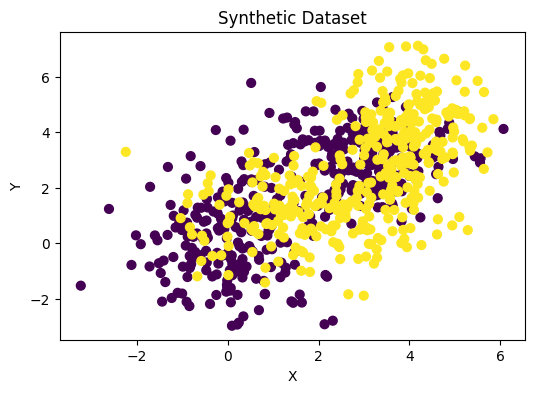

In [2]:
# Seed for reproducibility
np.random.seed(42)

# Create two Gaussian clusters for class 0
x0_1 = np.random.randn(200, 2) * [1.0, 1.5] + [0, 0]
x0_2 = np.random.randn(200, 2) * [1.0, 1.0] + [3, 3]
X0 = np.vstack([x0_1, x0_2])
y0 = np.zeros(X0.shape[0], dtype=int)

# Create two Gaussian clusters for class 1
x1_1 = np.random.randn(200, 2) * [1.5, 1.0] + [1.5, 1]
x1_2 = np.random.randn(200, 2) * [0.8, 1.2] + [4, 4]
X1 = np.vstack([x1_1, x1_2])
y1 = np.ones(X1.shape[0], dtype=int)

# Combine data
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

# Create DataFrame
df = pd.DataFrame({
    'X': X[:, 0],
    'Y': X[:, 1],
    'Class': y
})

print(df.head())
print(df['Class'].value_counts())

# Plot to verify
plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['Y'], c=df['Class'], cmap="viridis", s=40)
plt.title("Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [3]:
df.head()

,X,Y,Class
0,0.496714,-0.207396,0
1,0.647689,2.284545,0
2,-0.234153,-0.351205,0
3,1.579213,1.151152,0
4,-0.469474,0.813840,0


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

**With Batch Normalization**

In [6]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1 = model.fit(X,y,epochs=200,validation_split=0.2, verbose = 0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

**Without Batch Normalization**

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history2 = model.fit(X,y,epochs=200,validation_split=0.2, verbose = 0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

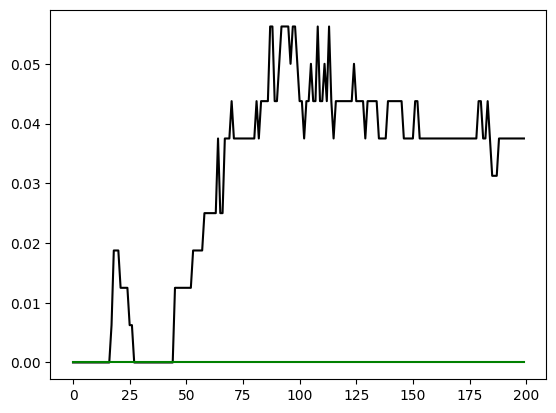

In [8]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')